# Elderly Motion Analytics for Fall Prevention

## **Introduction**  

In this project, I will perform **Simple Binomial Logistic Regression** to analyze the relationship between vertical acceleration and the likelihood of a person lying down. Logistic regression is a powerful statistical method for modeling binary outcomes, making it ideal for this classification task. I will explore the dataset through **Exploratory Data Analysis (EDA)**, assess key **logistic regression assumptions**, and build a predictive model to determine how changes in vertical acceleration influence lying-down behavior.  

The analysis will include **coefficient interpretation**, **odds ratio calculation**, and **model evaluation** using metrics such as accuracy, precision, recall, and AUC-ROC curves. Additionally, I will implement **cross-validation** and **error analysis** to ensure robustness and interpretability. Finally, I will discuss practical implications, limitations, and potential improvements to enhance predictive performance. This project aims to demonstrate how logistic regression can be applied to real-world classification problems while following best practices in model development and evaluation.

## **Overview**

This project investigates the relationship between vertical acceleration and lying down behavior in older adults using binomial logistic regression in Python. The goal is to determine how changes in vertical acceleration predict the likelihood of a person lying down, with potential applications in fall detection and health monitoring systems.

To guide this process, I follow the standard **Regression Modeling Workflow**—a four-stage cycle of planning, analyzing, constructing, and executing, as illustrated below:

|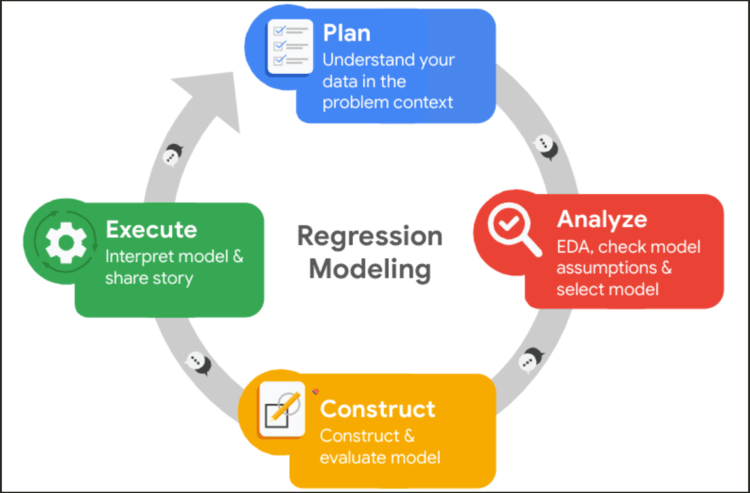 |  
|-------------------------------------| 

To achieve this, I will:

- **Perform Exploratory Data Analysis (EDA):** Examine the distribution of vertical acceleration and its relationship with lying down status using descriptive statistics and visualizations like boxplots and logistic regression plots, while also assessing class balance (lying down vs. not lying down) to identify potential biases in the dataset.  
- **Conduct Data Preprocessing:** Handle missing values (if present) to ensure data quality and split the dataset into training and holdout samples for model validation.  
- **Check Logistic Regression Assumptions:** Verify the binary nature of the outcome variable, ensure independence of observations and absence of multicollinearity, assess linearity between the independent variable (vertical acceleration) and log odds of lying down, and detect and address outliers that may skew model performance.  
- **Build and Interpret the Logistic Regression Model:** Train the model using the training dataset and extract coefficients (log odds), exponentiate coefficients to derive odds ratios for intuitive interpretation, and calculate confidence intervals for coefficients to quantify uncertainty.  
- **Visualize the Model:** Plot the logistic curve with a 95% confidence band to illustrate the relationship between vertical acceleration and lying down probability.  
- **Evaluate Model Performance:** Construct a confusion matrix to quantify true/false positives/negatives, compute metrics like accuracy, precision, recall, F1 score, and log loss, generate ROC curves and calculate AUC to assess discriminative power, and perform cross-validation to check model generalizability.  
- **Prepare for Deployment:** Serialize the trained model using `pickle` for future use and create a prediction function to classify new acceleration data.  
- **Summarize Findings and Recommendations:** Highlight key insights, discuss limitations, and suggest improvements.  

By executing this workflow, I aim to demonstrate how logistic regression can translate motion sensor data into actionable insights for elderly care, such as detecting inactivity or potential falls. The results could inform the development of wearable health monitors or assistive technologies.

## **Dataset Structure**

### **Body Position Recognition Dataset**  
This dataset contains accelerometer readings used to detect whether an individual is lying down or not. It supports the development of models that classify body posture based on motion data.

#### **Dataset: Acceleration and Lying Down Status**  
This dataset includes the following features:

- **Acc (vertical)**: The vertical acceleration measured by an accelerometer, typically in meters per second squared (m/s²).  
- **LyingDown**: A binary indicator where `1` represents that the person is lying down and `0` indicates otherwise.

This dataset will be used to **analyze the relationship between vertical acceleration and body position, and to build classification models for posture detection.**

### **Importing Required Libraries**

Before beginning the analysis, I import the essential Python libraries that support data manipulation, visualization, and machine learning model development. These libraries provide the core functionality for handling structured data, building classification models, and evaluating performance.

### **Library & Package Versions**  
Maintaining consistent library versions ensures **reproducibility, stability, and compatibility** throughout the workflow. The following versions were used in this project:

- **Pandas:** 2.2.3  
- **NumPy:** 2.2.4  
- **Seaborn:** 0.13.2  
- **Matplotlib:** 3.10.1  
- **Scikit-learn:** 1.6.1  

### **Imports and Setup**

**Core Data Handling**
- `pandas` for manipulating tabular data using DataFrames.  
- `numpy` for numerical computations and array operations.

**Data Visualization**
- `seaborn` for statistical data visualization with built-in themes and tools.  
- `matplotlib.pyplot` for general-purpose plotting.

**Machine Learning and Evaluation**
- `train_test_split` from `sklearn.model_selection` for splitting the dataset into training and testing sets.  
- `LogisticRegression` from `sklearn.linear_model` for training a binary classifier.  
- `sklearn.metrics` tools including:
  - `confusion_matrix`, `ConfusionMatrixDisplay` for classification result evaluation.
  - `precision_score`, `recall_score`, `accuracy_score`, `roc_auc_score` for performance metrics.  
  - `RocCurveDisplay` for plotting ROC curves.  
  - `classification_report` for a summary of key classification metrics.

In [ ]:
import pandas as pd
import numpy as np 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import (confusion_matrix, 
                            ConfusionMatrixDisplay,
                            precision_score,
                            recall_score,
                            accuracy_score,
                            roc_auc_score,
                            RocCurveDisplay,
                            classification_report)


In [2]:
Data=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Elderly-Motion-Analytics-for-Fall-Prevention\Data\activity.csv")

In [3]:
Data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


<Axes: xlabel='Acc (vertical)', ylabel='Count'>

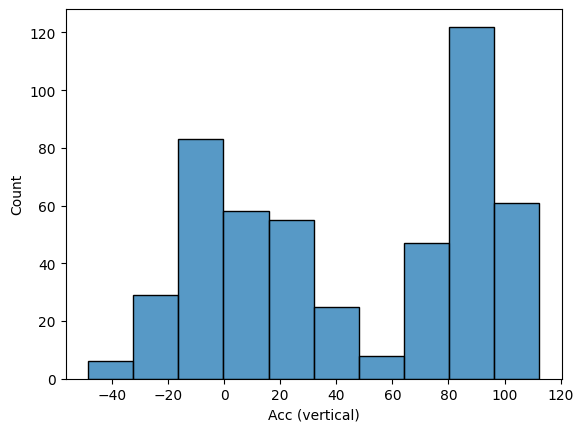

In [4]:
sns.histplot(x=Data['Acc (vertical)'])

In [5]:
from scipy.stats import shapiro


stat, p = shapiro(Data['Acc (vertical)'])
print(f"Shapiro-Wilk test statistic = {stat}, p-value = {p}")

if p > 0.05:
    print("Probably normal")
else:
    print("Probably not normal")

Shapiro-Wilk test statistic = 0.8847422677730177, p-value = 9.624080081102076e-19
Probably not normal
